#### To find the best value for money menu offerings at KFC, price and nutritional values (protein and kilojoules) will be used as the core components for analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('KFCPriceNutrition.csv')

# Data Preparation

#### Introducing new columns to dataset, to examine Protein Price Ratio, Energy Price Ratio and if menu item is a combo

In [3]:
df['Protein_Price_Ratio'] = df['Protein (g)'] / df['Price']

In [4]:
df['Energy_Price_Ratio'] = df['Energy (kJ)'] / df['Price']

In [5]:
# Menu items that are combos will have one of these words in their product name. A combo is considered as a menu offering that has more than one item type e.g. piece of chicken and chips
specific_words = ['Meal', 'Combo', 'Bucket', 'Fill Up', 'Feast', 'Lunch', 'Double Slider', 'Box', 'Cheap', 'Pack']

In [6]:
df['Is_Combo'] = df['Product'].str.contains('|'.join(specific_words)).astype(int)

In [7]:
df

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
1,6 Hot Rods,11.95,337.0,3966.0,60.4,63.5,7.3,34.7,3.0,2700.0,5.054393,331.882845,0
2,Hot Rods Combo,8.95,615.0,2733.0,25.0,37.8,4.0,53.9,1.6,1092.0,2.793296,305.363128,1
3,Hot Rods Box,14.95,911.0,4709.0,53.9,56.0,5.9,102.3,8.2,2502.0,3.605351,314.983278,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Large Chips,5.25,240.0,2338.0,9.1,23.5,2.4,83.3,0.5,194.0,1.733333,445.333333,0
85,Double Chocolate Mousse,3.25,92.0,1490.0,2.8,29.9,21.4,19.8,16.8,22.0,0.861538,458.461538,0
86,Crunchy Jalapeno Slaw,5.95,181.0,768.0,3.0,10.4,0.8,17.2,10.0,321.0,0.504202,129.075630,0
87,Large Potato & Gravy,7.45,450.0,1134.0,7.7,4.5,0.9,49.5,3.2,2025.0,1.033557,152.214765,0


In [8]:
# Export DataFrame to CSV for use in PowerBI
df.to_csv('KFCPriceNutritionFORMATTED.csv', index = False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Product                   89 non-null     object 
 1   Price                     89 non-null     float64
 2   Average serving size (g)  89 non-null     float64
 3   Energy (kJ)               89 non-null     float64
 4   Protein (g)               89 non-null     float64
 5   Fat, total (g)            89 non-null     float64
 6   Fat, saturated (g)        89 non-null     float64
 7   Carbohydrate (g)          89 non-null     float64
 8   Carbohydrate, sugars (g)  89 non-null     float64
 9   Sodium (mg)               89 non-null     float64
 10  Protein_Price_Ratio       89 non-null     float64
 11  Energy_Price_Ratio        89 non-null     float64
 12  Is_Combo                  89 non-null     int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 8.8+ KB


In [10]:
df.describe()

,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,11.997191,621.707865,3995.134831,49.943820,49.210112,7.243820,78.135955,7.385393,1789.280899,3.539015,308.560519,0.58427
std,7.802944,646.655912,4272.438739,67.701472,53.659700,9.272442,78.137688,9.117024,1952.528832,1.670182,110.186630,0.49564
min,2.950000,78.000000,277.000000,1.900000,1.100000,0.200000,6.600000,0.200000,22.000000,0.348624,50.825688,0.00000
25%,6.950000,209.000000,2046.000000,21.000000,26.400000,2.700000,36.500000,1.200000,780.000000,2.610879,239.798995,0.00000
50%,9.950000,574.000000,3012.000000,30.800000,36.800000,4.400000,64.100000,5.800000,1319.000000,3.226667,293.864307,1.00000
75%,14.450000,806.000000,4323.000000,52.100000,55.000000,8.000000,89.100000,9.700000,2025.000000,3.949580,343.865546,1.00000
max,48.950000,4312.000000,27754.000000,428.700000,344.600000,55.500000,490.300000,60.700000,12575.000000,11.296443,687.676768,1.00000


# Analysis on Protein Price Ratios

In [11]:
df_protein_sorted = df.sort_values(by='Protein_Price_Ratio', ascending=False)

#### All Menu Items

In [12]:
# Top 10
df_protein_sorted.head(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
28,21 Pieces of Chicken,37.95,1817.0,20654.0,428.7,292.5,54.5,150.8,3.6,8538.0,11.296443,544.242424,0
9,Cheap as Chips,24.95,2224.0,16762.0,213.5,193.0,30.5,354.3,23.7,8656.0,8.557114,671.823647,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
27,6 Pieces of Chicken,16.95,519.0,5901.0,122.5,83.6,15.6,43.1,1.0,2439.0,7.227139,348.141593,0
16,Family Feast,37.95,3495.0,17566.0,235.3,205.2,33.5,353.4,60.7,7290.0,6.200264,462.872200,1
6,6 Wicked Wings Lunch,7.95,356.0,4239.0,47.8,61.9,9.7,67.4,0.9,1497.0,6.012579,533.207547,1
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
26,1 Piece of Chicken,3.45,87.0,984.0,20.4,13.9,2.6,7.2,0.2,407.0,5.913043,285.217391,0
17,Value Feast,27.95,1403.0,11725.0,160.2,144.6,20.8,215.1,18.1,6289.0,5.731664,419.499106,1
39,10 Wicked Wings,12.95,394.0,5039.0,72.1,83.5,14.2,42.9,1.2,2332.0,5.567568,389.111969,0


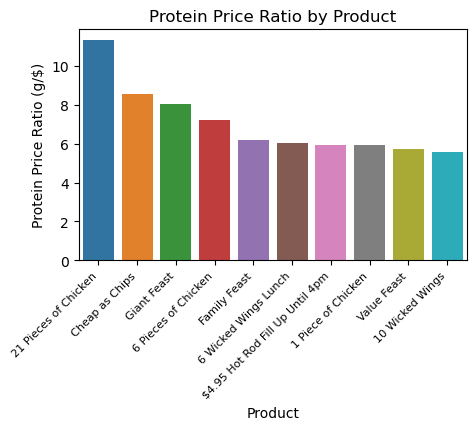

In [13]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Protein_Price_Ratio', data=df_protein_sorted.head(10))
plt.title('Protein Price Ratio by Product')
plt.xlabel('Product')
plt.ylabel('Protein Price Ratio (g/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

In [14]:
# Bottom 10
df_protein_sorted.tail(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
45,6 Nuggets,7.95,127.0,1324.0,16.2,15.8,2.3,27.1,12.1,780.0,2.037736,166.540881,0
70,Original Tender Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
79,Original Tenders Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
46,6 Nugget Combo,11.95,622.0,2545.0,21.0,27.5,3.5,69.0,12.3,926.0,1.757322,212.970711,1
83,Large Chips,5.25,240.0,2431.0,9.1,23.5,2.4,83.3,0.5,194.0,1.733333,463.047619,0
84,Large Chips,5.25,240.0,2338.0,9.1,23.5,2.4,83.3,0.5,194.0,1.733333,445.333333,0
87,Large Potato & Gravy,7.45,450.0,1134.0,7.7,4.5,0.9,49.5,3.2,2025.0,1.033557,152.214765,0
85,Double Chocolate Mousse,3.25,92.0,1490.0,2.8,29.9,21.4,19.8,16.8,22.0,0.861538,458.461538,0
86,Crunchy Jalapeno Slaw,5.95,181.0,768.0,3.0,10.4,0.8,17.2,10.0,321.0,0.504202,129.075630,0
88,Regular Potato & Gravy,5.45,110.0,277.0,1.9,1.1,0.2,12.1,0.8,495.0,0.348624,50.825688,0


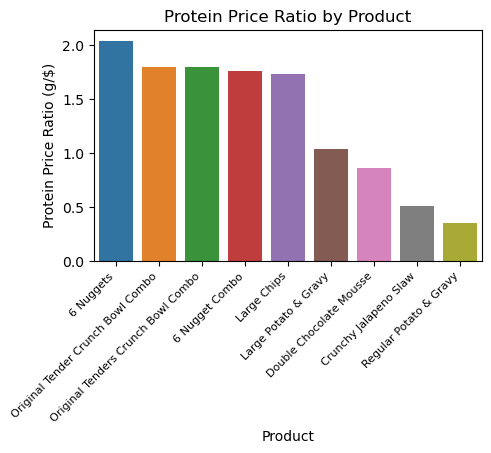

In [15]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Protein_Price_Ratio', data=df_protein_sorted.tail(10))
plt.title('Protein Price Ratio by Product')
plt.xlabel('Product')
plt.ylabel('Protein Price Ratio (g/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

#### Combos only

In [16]:
df_combos_protein = df_protein_sorted[df_protein_sorted['Is_Combo'] == 1]

In [17]:
# Top 10
df_combos_protein.head(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
9,Cheap as Chips,24.95,2224.0,16762.0,213.5,193.0,30.5,354.3,23.7,8656.0,8.557114,671.823647,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
16,Family Feast,37.95,3495.0,17566.0,235.3,205.2,33.5,353.4,60.7,7290.0,6.200264,462.872200,1
6,6 Wicked Wings Lunch,7.95,356.0,4239.0,47.8,61.9,9.7,67.4,0.9,1497.0,6.012579,533.207547,1
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
17,Value Feast,27.95,1403.0,11725.0,160.2,144.6,20.8,215.1,18.1,6289.0,5.731664,419.499106,1
19,3 Piece Box,14.45,905.0,4909.0,72.0,57.1,9.5,92.4,4.4,1993.0,4.982699,339.723183,1
18,Burger Feast,33.95,1431.0,14417.0,158.6,150.6,16.1,364.4,36.9,5436.0,4.671576,424.653903,1
23,BBQ Bacon Stacker Burger Box,17.95,993.0,5584.0,82.4,63.6,12.2,108.4,12.0,2987.0,4.590529,311.086351,1
40,10 Wicked Wings Combo,16.95,889.0,6261.0,76.9,95.3,15.4,84.8,1.4,2478.0,4.536873,369.380531,1


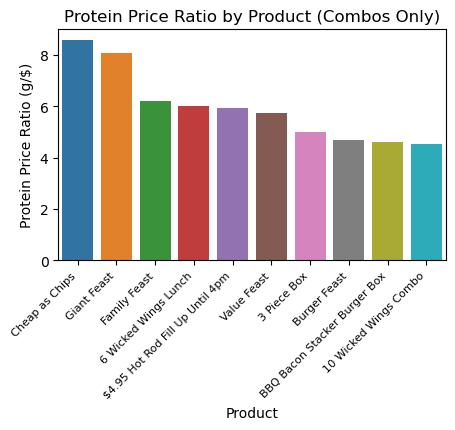

In [18]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Protein_Price_Ratio', data=df_combos_protein.head(10))
plt.title('Protein Price Ratio by Product (Combos Only)')
plt.xlabel('Product')
plt.ylabel('Protein Price Ratio (g/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

In [19]:
# Bottom 10
df_combos_protein.tail(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
60,Original Recipe Burger Combo,11.95,664.0,2819.0,29.8,27.5,2.9,77.0,6.0,922.0,2.493724,235.899582,1
81,Kids Meal with Nuggets,6.25,815.0,2189.0,15.4,22.4,2.8,64.7,12.2,680.0,2.464000,350.240000,1
36,3 Wicked Wings Combo,10.95,613.0,2733.0,26.4,36.8,5.5,54.7,0.6,846.0,2.410959,249.589041,1
42,3 Original Tenders Combo,12.95,633.0,3013.0,31.0,41.5,3.9,55.9,1.6,1132.0,2.393822,232.664093,1
48,10 Nugget Combo,13.95,718.0,3519.0,31.8,38.2,5.1,92.1,24.3,1509.0,2.279570,252.258065,1
80,Kids Meal with BBQ Slider,6.25,807.0,1417.0,13.2,12.1,1.7,43.2,19.5,654.0,2.112000,226.720000,1
68,Zinger Crunch Bowl Combo,13.95,770.0,2866.0,28.8,32.6,3.1,66.8,10.5,1095.0,2.064516,205.448029,1
70,Original Tender Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
79,Original Tenders Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
46,6 Nugget Combo,11.95,622.0,2545.0,21.0,27.5,3.5,69.0,12.3,926.0,1.757322,212.970711,1


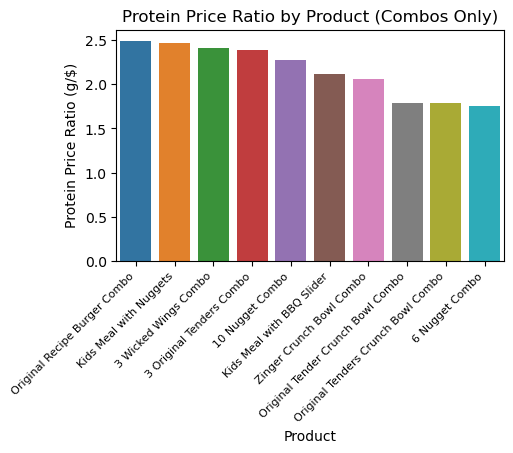

In [20]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Protein_Price_Ratio', data=df_combos_protein.tail(10))
plt.title('Protein Price Ratio by Product (Combos Only)')
plt.xlabel('Product')
plt.ylabel('Protein Price Ratio (g/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

# Analysis on Energy Price Ratios

In [21]:
df_energy_sorted = df.sort_values(by='Energy_Price_Ratio', ascending=False)

#### All menu items

In [22]:
# Top 10
df_energy_sorted.head(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
9,Cheap as Chips,24.95,2224.0,16762.0,213.5,193.0,30.5,354.3,23.7,8656.0,8.557114,671.823647,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
28,21 Pieces of Chicken,37.95,1817.0,20654.0,428.7,292.5,54.5,150.8,3.6,8538.0,11.296443,544.242424,0
6,6 Wicked Wings Lunch,7.95,356.0,4239.0,47.8,61.9,9.7,67.4,0.9,1497.0,6.012579,533.207547,1
5,$6.95 Double Slider & Chips,6.95,314.0,3437.0,28.7,38.1,4.4,89.9,5.9,1062.0,4.129496,494.532374,1
71,Go Bucket Popcorn Chicken,4.95,199.0,2351.0,18.5,27.2,2.7,60.9,0.6,709.0,3.737374,474.949495,1
83,Large Chips,5.25,240.0,2431.0,9.1,23.5,2.4,83.3,0.5,194.0,1.733333,463.047619,0
16,Family Feast,37.95,3495.0,17566.0,235.3,205.2,33.5,353.4,60.7,7290.0,6.200264,462.872200,1
85,Double Chocolate Mousse,3.25,92.0,1490.0,2.8,29.9,21.4,19.8,16.8,22.0,0.861538,458.461538,0


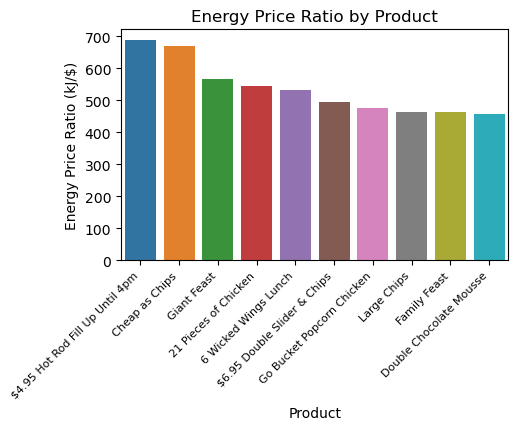

In [23]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Energy_Price_Ratio', data=df_energy_sorted.head(10))
plt.title('Energy Price Ratio by Product')
plt.xlabel('Product')
plt.ylabel('Energy Price Ratio (kJ/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

In [24]:
# Bottom 10
df_energy_sorted.tail(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
59,Original Recipe Burger,7.95,169.0,1597.0,25.0,15.7,1.7,35.1,5.8,776.0,3.144654,200.880503,0
41,3 Original Tenders,8.95,138.0,1791.0,26.2,29.8,2.7,14.1,1.3,986.0,2.927374,200.111732,0
69,Original Tenders Crunch Bowl,9.45,257.0,1794.0,20.2,26.7,2.4,25.0,9.3,871.0,2.137566,189.841270,0
30,Zinger Fillet Piece,4.95,95.0,876.0,21.0,10.5,1.0,7.8,0.3,628.0,4.242424,176.969697,0
67,Zinger Crunch Bowl,9.45,275.0,1644.0,24.0,20.9,1.9,24.9,10.3,949.0,2.539683,173.968254,0
45,6 Nuggets,7.95,127.0,1324.0,16.2,15.8,2.3,27.1,12.1,780.0,2.037736,166.540881,0
29,Original Fillet Piece,4.95,78.0,774.0,19.0,9.2,1.1,6.6,0.2,489.0,3.838384,156.363636,0
87,Large Potato & Gravy,7.45,450.0,1134.0,7.7,4.5,0.9,49.5,3.2,2025.0,1.033557,152.214765,0
86,Crunchy Jalapeno Slaw,5.95,181.0,768.0,3.0,10.4,0.8,17.2,10.0,321.0,0.504202,129.075630,0
88,Regular Potato & Gravy,5.45,110.0,277.0,1.9,1.1,0.2,12.1,0.8,495.0,0.348624,50.825688,0


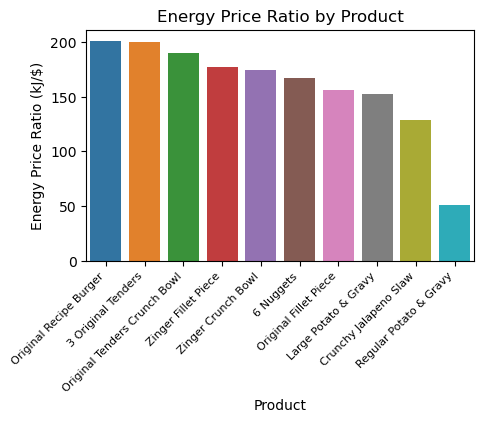

In [25]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Energy_Price_Ratio', data=df_energy_sorted.tail(10))
plt.title('Energy Price Ratio by Product')
plt.xlabel('Product')
plt.ylabel('Energy Price Ratio (kJ/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

#### Combo only

In [26]:
df_combos_energy = df_energy_sorted[df_energy_sorted['Is_Combo'] == 1]

In [27]:
# Top 10
df_combos_energy.head(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
9,Cheap as Chips,24.95,2224.0,16762.0,213.5,193.0,30.5,354.3,23.7,8656.0,8.557114,671.823647,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
6,6 Wicked Wings Lunch,7.95,356.0,4239.0,47.8,61.9,9.7,67.4,0.9,1497.0,6.012579,533.207547,1
5,$6.95 Double Slider & Chips,6.95,314.0,3437.0,28.7,38.1,4.4,89.9,5.9,1062.0,4.129496,494.532374,1
71,Go Bucket Popcorn Chicken,4.95,199.0,2351.0,18.5,27.2,2.7,60.9,0.6,709.0,3.737374,474.949495,1
16,Family Feast,37.95,3495.0,17566.0,235.3,205.2,33.5,353.4,60.7,7290.0,6.200264,462.872200,1
73,Go Bucket 2 Wicked Wings,4.95,199.0,2223.0,19.0,28.5,4.0,50.2,0.5,564.0,3.838384,449.090909,1
78,Popcorn & Slider Pack,7.95,296.0,3506.0,30.6,41.7,4.4,84.8,3.3,1186.0,3.849057,441.006289,1
18,Burger Feast,33.95,1431.0,14417.0,158.6,150.6,16.1,364.4,36.9,5436.0,4.671576,424.653903,1


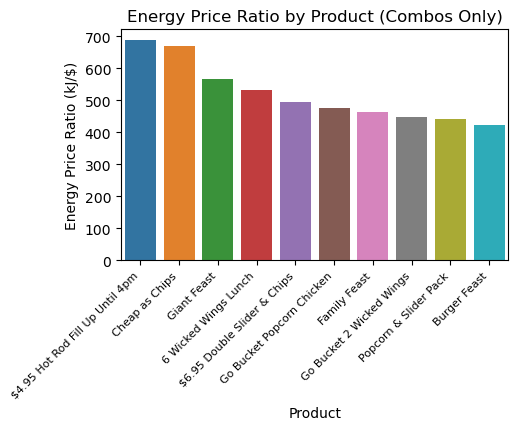

In [28]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Energy_Price_Ratio', data=df_combos_energy.head(10))
plt.title('Energy Price Ratio by Product (Combos Only)')
plt.xlabel('Product')
plt.ylabel('Energy Price Ratio (kJ/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

In [29]:
# Bottom 10
df_combos_energy.tail(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
36,3 Wicked Wings Combo,10.95,613.0,2733.0,26.4,36.8,5.5,54.7,0.6,846.0,2.410959,249.589041,1
11,3 Pieces Combo Hot & Crispy,11.95,643.0,2967.0,31.2,36.5,4.3,64.1,0.8,1465.0,2.610879,248.284519,1
52,Zinger Burger Combo,11.95,681.0,2921.0,31.8,28.8,2.9,78.2,6.1,1061.0,2.661088,244.435146,1
60,Original Recipe Burger Combo,11.95,664.0,2819.0,29.8,27.5,2.9,77.0,6.0,922.0,2.493724,235.899582,1
42,3 Original Tenders Combo,12.95,633.0,3013.0,31.0,41.5,3.9,55.9,1.6,1132.0,2.393822,232.664093,1
80,Kids Meal with BBQ Slider,6.25,807.0,1417.0,13.2,12.1,1.7,43.2,19.5,654.0,2.112000,226.720000,1
79,Original Tenders Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
70,Original Tender Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
46,6 Nugget Combo,11.95,622.0,2545.0,21.0,27.5,3.5,69.0,12.3,926.0,1.757322,212.970711,1
68,Zinger Crunch Bowl Combo,13.95,770.0,2866.0,28.8,32.6,3.1,66.8,10.5,1095.0,2.064516,205.448029,1


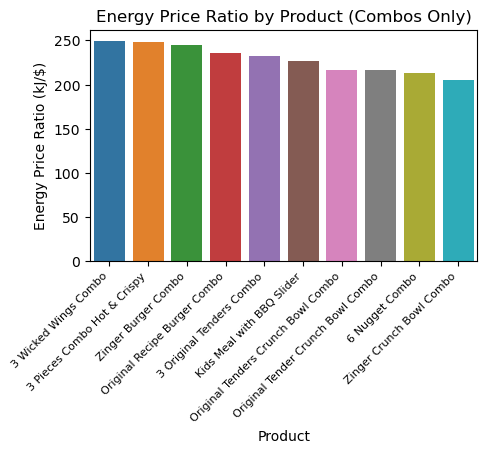

In [30]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Energy_Price_Ratio', data=df_combos_energy.tail(10))
plt.title('Energy Price Ratio by Product (Combos Only)')
plt.xlabel('Product')
plt.ylabel('Energy Price Ratio (kJ/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

# Analysis on Energy Protein Price Ratios

In [31]:
df_ep_sorted = df.sort_values(by=['Protein_Price_Ratio', 'Energy_Price_Ratio'], ascending=False)

#### All menu items

In [32]:
# Top 10
df_ep_sorted.head(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
28,21 Pieces of Chicken,37.95,1817.0,20654.0,428.7,292.5,54.5,150.8,3.6,8538.0,11.296443,544.242424,0
9,Cheap as Chips,24.95,2224.0,16762.0,213.5,193.0,30.5,354.3,23.7,8656.0,8.557114,671.823647,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
27,6 Pieces of Chicken,16.95,519.0,5901.0,122.5,83.6,15.6,43.1,1.0,2439.0,7.227139,348.141593,0
16,Family Feast,37.95,3495.0,17566.0,235.3,205.2,33.5,353.4,60.7,7290.0,6.200264,462.872200,1
6,6 Wicked Wings Lunch,7.95,356.0,4239.0,47.8,61.9,9.7,67.4,0.9,1497.0,6.012579,533.207547,1
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
26,1 Piece of Chicken,3.45,87.0,984.0,20.4,13.9,2.6,7.2,0.2,407.0,5.913043,285.217391,0
17,Value Feast,27.95,1403.0,11725.0,160.2,144.6,20.8,215.1,18.1,6289.0,5.731664,419.499106,1
39,10 Wicked Wings,12.95,394.0,5039.0,72.1,83.5,14.2,42.9,1.2,2332.0,5.567568,389.111969,0


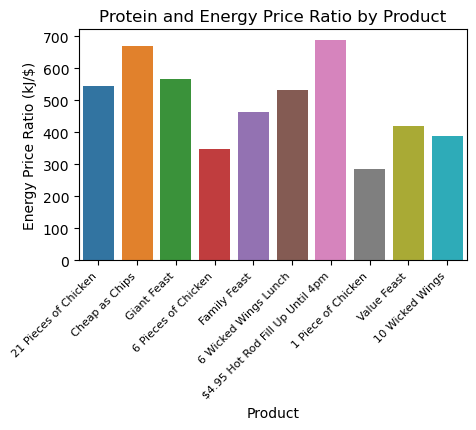

In [33]:
plt.figure(figsize=(5, 3))
chart = sns.barplot(x='Product', y='Energy_Price_Ratio', data=df_ep_sorted.head(10))
plt.title('Protein and Energy Price Ratio by Product')
plt.xlabel('Product')
plt.ylabel('Energy Price Ratio (kJ/$)')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.show()

In [34]:
# Top 10
df_ep_sorted.tail(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
45,6 Nuggets,7.95,127.0,1324.0,16.2,15.8,2.3,27.1,12.1,780.0,2.037736,166.540881,0
70,Original Tender Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
79,Original Tenders Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
46,6 Nugget Combo,11.95,622.0,2545.0,21.0,27.5,3.5,69.0,12.3,926.0,1.757322,212.970711,1
83,Large Chips,5.25,240.0,2431.0,9.1,23.5,2.4,83.3,0.5,194.0,1.733333,463.047619,0
84,Large Chips,5.25,240.0,2338.0,9.1,23.5,2.4,83.3,0.5,194.0,1.733333,445.333333,0
87,Large Potato & Gravy,7.45,450.0,1134.0,7.7,4.5,0.9,49.5,3.2,2025.0,1.033557,152.214765,0
85,Double Chocolate Mousse,3.25,92.0,1490.0,2.8,29.9,21.4,19.8,16.8,22.0,0.861538,458.461538,0
86,Crunchy Jalapeno Slaw,5.95,181.0,768.0,3.0,10.4,0.8,17.2,10.0,321.0,0.504202,129.075630,0
88,Regular Potato & Gravy,5.45,110.0,277.0,1.9,1.1,0.2,12.1,0.8,495.0,0.348624,50.825688,0


#### Combo only

In [35]:
df_combos_ep = df_ep_sorted[df_ep_sorted['Is_Combo'] == 1]

In [36]:
# Top 10
df_combos_ep.head(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
9,Cheap as Chips,24.95,2224.0,16762.0,213.5,193.0,30.5,354.3,23.7,8656.0,8.557114,671.823647,1
4,Giant Feast,48.95,4312.0,27754.0,394.4,344.6,55.5,490.3,34.6,12575.0,8.057201,566.986721,1
16,Family Feast,37.95,3495.0,17566.0,235.3,205.2,33.5,353.4,60.7,7290.0,6.200264,462.872200,1
6,6 Wicked Wings Lunch,7.95,356.0,4239.0,47.8,61.9,9.7,67.4,0.9,1497.0,6.012579,533.207547,1
0,$4.95 Hot Rod Fill Up Until 4pm,4.95,380.0,3404.0,29.4,40.8,4.2,81.7,5.1,1550.0,5.939394,687.676768,1
17,Value Feast,27.95,1403.0,11725.0,160.2,144.6,20.8,215.1,18.1,6289.0,5.731664,419.499106,1
19,3 Piece Box,14.45,905.0,4909.0,72.0,57.1,9.5,92.4,4.4,1993.0,4.982699,339.723183,1
18,Burger Feast,33.95,1431.0,14417.0,158.6,150.6,16.1,364.4,36.9,5436.0,4.671576,424.653903,1
23,BBQ Bacon Stacker Burger Box,17.95,993.0,5584.0,82.4,63.6,12.2,108.4,12.0,2987.0,4.590529,311.086351,1
40,10 Wicked Wings Combo,16.95,889.0,6261.0,76.9,95.3,15.4,84.8,1.4,2478.0,4.536873,369.380531,1


In [37]:
# Bottom 10
df_combos_ep.tail(10)

,Product,Price,Average serving size (g),Energy (kJ),Protein (g),"Fat, total (g)","Fat, saturated (g)",Carbohydrate (g),"Carbohydrate, sugars (g)",Sodium (mg),Protein_Price_Ratio,Energy_Price_Ratio,Is_Combo
60,Original Recipe Burger Combo,11.95,664.0,2819.0,29.8,27.5,2.9,77.0,6.0,922.0,2.493724,235.899582,1
81,Kids Meal with Nuggets,6.25,815.0,2189.0,15.4,22.4,2.8,64.7,12.2,680.0,2.464000,350.240000,1
36,3 Wicked Wings Combo,10.95,613.0,2733.0,26.4,36.8,5.5,54.7,0.6,846.0,2.410959,249.589041,1
42,3 Original Tenders Combo,12.95,633.0,3013.0,31.0,41.5,3.9,55.9,1.6,1132.0,2.393822,232.664093,1
48,10 Nugget Combo,13.95,718.0,3519.0,31.8,38.2,5.1,92.1,24.3,1509.0,2.279570,252.258065,1
80,Kids Meal with BBQ Slider,6.25,807.0,1417.0,13.2,12.1,1.7,43.2,19.5,654.0,2.112000,226.720000,1
68,Zinger Crunch Bowl Combo,13.95,770.0,2866.0,28.8,32.6,3.1,66.8,10.5,1095.0,2.064516,205.448029,1
70,Original Tender Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
79,Original Tenders Crunch Bowl Combo,13.95,752.0,3016.0,25.0,38.4,3.6,66.9,9.5,1017.0,1.792115,216.200717,1
46,6 Nugget Combo,11.95,622.0,2545.0,21.0,27.5,3.5,69.0,12.3,926.0,1.757322,212.970711,1
